In [69]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
import math
import numpy as np

In [70]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [71]:
response=requests.get(query)

In [72]:
df = pd.DataFrame(response.json()['historical'])

In [73]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-02,48840.414063,49817.667969,48767.839844,49598.503906,49598.503906,3.908957e+10,3.908957e+10,758.08984,1.552,49394.67057,"September 02, 21",0.01552
1,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
2,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
3,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
4,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1823,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1824,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
1825,2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937


In [74]:
df['date'] = pd.to_datetime(df['date'])

In [75]:
df_2 = df[['date', 'adjClose']]

In [76]:
df_2

,date,adjClose
0,2021-09-02,49598.503906
1,2021-09-01,48847.027344
2,2021-08-31,47166.687500
3,2021-08-30,47054.984375
4,2021-08-29,48829.832031
...,...,...
1822,2016-09-06,610.435974
1823,2016-09-05,606.590027
1824,2016-09-04,608.633972
1825,2016-09-03,598.211975


In [77]:
date = pd.to_datetime('2020-09-01')

In [78]:
df_lastyear = df_2[df_2['date']>date]

In [79]:
df_lastyear = df_lastyear.set_index('date')

In [80]:
df_lastyear

,adjClose
date,
2021-09-02,49598.503906
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
2021-08-29,48829.832031
...,...
2020-09-06,10280.351563
2020-09-05,10169.567383
2020-09-04,10511.813477


In [81]:
y = df_lastyear.adjClose

<AxesSubplot:xlabel='date'>

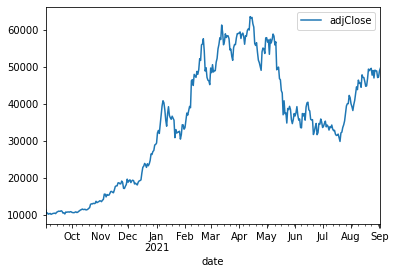

In [82]:
df_lastyear.plot()

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
# 0 diff
print('p-value: ', adfuller(y)[1])

p-value:  0.8520081222791589


In [85]:
# First diff
print('p-value: ', adfuller(y.diff(1).fillna(0))[1])

p-value:  2.616582663401252e-06


In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

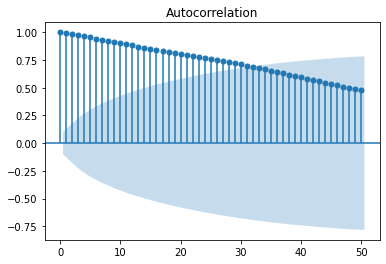

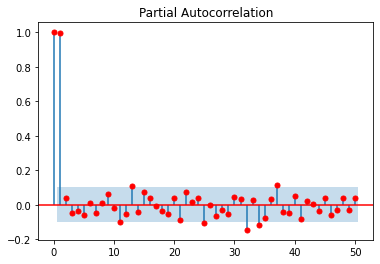

In [87]:
plot_acf(df_lastyear['adjClose'], lags=50);
plot_pacf(df_lastyear['adjClose'], lags=50, c='r');

## Log-differenced data

In [88]:
log_data = np.log(df_lastyear['adjClose'])

In [89]:
log_data_diff = log_data.diff()

In [90]:
log_diffed_data = pd.DataFrame(log_data_diff.drop(df_lastyear.index[0]))

In [91]:
log_diffed_data

,adjClose
date,
2021-09-01,-0.015267
2021-08-31,-0.035006
2021-08-30,-0.002371
2021-08-29,0.037025
2021-08-28,0.001485
...,...
2020-09-06,-0.008640
2020-09-05,-0.010835
2020-09-04,0.033100


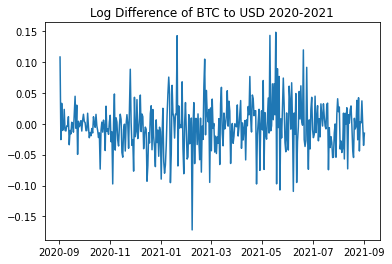

In [92]:
plt.plot(log_diffed_data)
plt.title("Log Difference of BTC to USD 2020-2021")
plt.show()

In [93]:
ad_fuller_result = adfuller(log_diffed_data['adjClose'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -20.132590719630237
p-value: 0.0


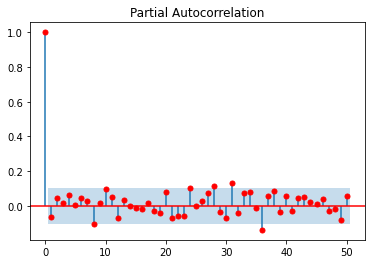

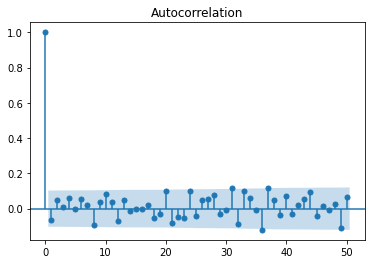

In [94]:
plot_pacf(log_diffed_data['adjClose'], lags=50, c='r');
plot_acf(log_diffed_data['adjClose'], lags=50);

## Differencing 

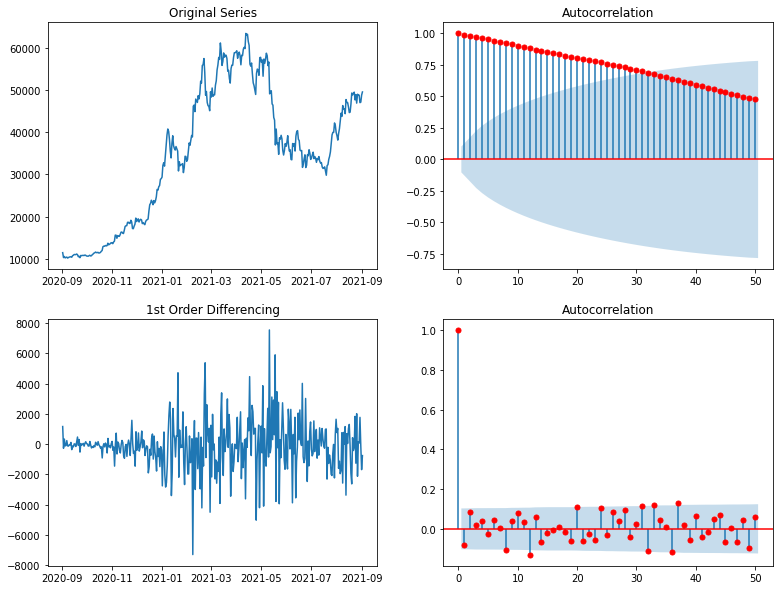

In [95]:
# Original Series
fig, axes = plt.subplots(2, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, lags=50, ax=axes[0, 1], c='r')

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), lags=50, ax=axes[1, 1], c='r')

plt.show()

In [96]:
y_diff = y.diff().dropna()

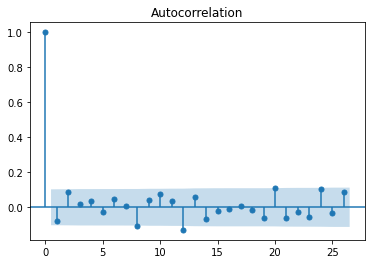

In [97]:
plot_acf(y_diff);

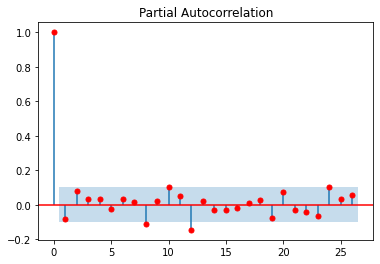

In [98]:
plot_pacf(y_diff, c='r');

## Train/Test split

In [99]:
train = df_lastyear[73:]
train

,adjClose
date,
2021-06-21,31676.693359
2021-06-20,35698.296875
2021-06-19,35615.871094
2021-06-18,35787.246094
2021-06-17,38053.503906
...,...
2020-09-06,10280.351563
2020-09-05,10169.567383
2020-09-04,10511.813477


In [100]:
test = df_lastyear[:73]
test

,adjClose
date,
2021-09-02,49598.503906
2021-09-01,48847.027344
2021-08-31,47166.687500
2021-08-30,47054.984375
2021-08-29,48829.832031
...,...
2021-06-26,32186.277344
2021-06-25,31637.779297
2021-06-24,34662.437500


## ARIMA ON DF

In [101]:
from statsmodels.tsa.arima_model import ARIMA
# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80059D+00    |proj g|=  1.38201D-04

At iterate    5    f=  8.80059D+00    |proj g|=  7.92255D-05

At iterate   10    f=  8.80059D+00    |proj g|=  1.77636D-07

At iterate   15    f=  8.80059D+00    |proj g|=  3.55271D-07

At iterate   20    f=  8.80059D+00    |proj g|=  3.01981D-06

At iterate   25    f=  8.80059D+00    |proj g|=  1.68754D-05

At iterate   30    f=  8.80059D+00    |proj g|=  4.61853D-06

At iterate   35    f=  8.80059D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3212.214
Method:                       css-mle   S.D. of innovations           1606.202
Date:                Thu, 02 Sep 2021   AIC                           6432.428
Time:                        11:45:09   BIC                           6448.027
Sample:                             1   HQIC                          6438.627
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -104.8645     79.705     -1.316      0.188    -261.084      51.355
ar.L1.D.adjClose    -0.5916      0.290     -2.040      0.041      -1.160      -0.023
ma.L1.D.adjClose     0.5088      0.309      1.648      0.099      -0.096       1.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6902           +0.0000j            1.6902            0.5000
MA.1           -1.9653           +0.0000j            1.9653            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA ON TRAIN DF

In [177]:
df_lastyear[1:2]['adjClose']

date
2021-09-01    48847.027344
Name: adjClose, dtype: float64

In [181]:
absolute_next_day_prediction = arima.predict()[0] + df_lastyear[1:2]['adjClose']
absolute_next_day_prediction

date
2021-09-01    48742.162825
Name: adjClose, dtype: float64

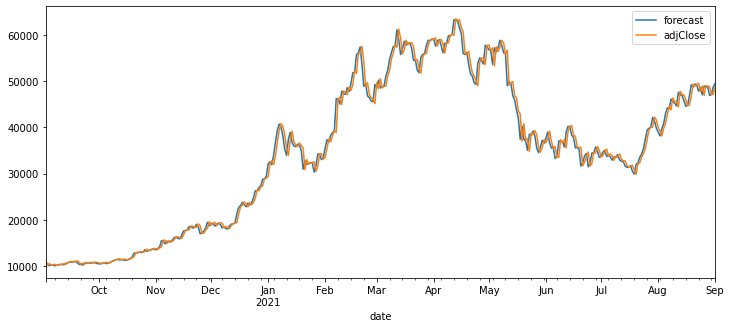

In [104]:
arima.plot_predict(end='2020-09-02', start='2021-09-01', dynamic=False);
fig = plt.gcf(); fig.set_size_inches(12, 5);

In [126]:
(forecast, stderr, conf_int) = arima.forecast(len(test), alpha=0.05)

In [140]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

In [141]:
conf_int[0:5]

,low,high
date,,
2021-09-02,8039.958929,14336.156689
2021-09-01,6883.143454,15426.553453
2021-08-31,5763.642277,16251.536823
2021-08-30,4910.860876,16944.753996
2021-08-29,4082.789591,17533.416508


In [153]:
forecast[:5]

date
2021-09-02    11188.057809
2021-09-01    11154.848453
2021-08-31    11007.589550
2021-08-30    10927.807436
2021-08-29    10808.103049
Name: forecast, dtype: float64

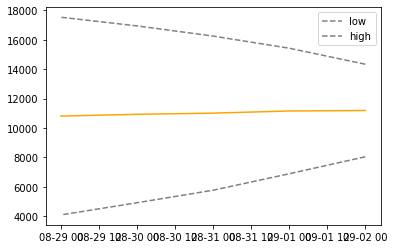

In [154]:
plt.plot(forecast[:5], c='orange')
plt.plot(conf_int['low'][0:5], label='low', c='grey', ls='--')
plt.plot(conf_int['high'][0:5], label='high', c='grey', ls='--')
plt.legend()

In [137]:
forecast.index = test['adjClose'].index
conf_int.index = test['adjClose'].index

<AxesSubplot:title={'center':'Residuals'}, xlabel='date'>

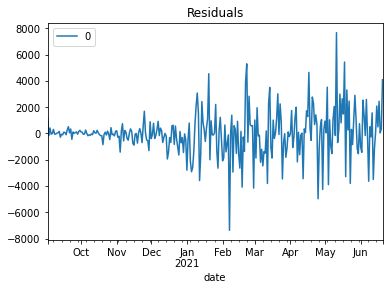

In [111]:
residuals = pd.DataFrame(arima_train.resid)
residuals.plot(title="Residuals")

<AxesSubplot:title={'center':'Residual density'}, ylabel='Density'>

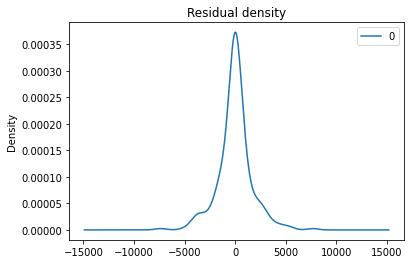

In [112]:
residuals.plot(kind='kde', title='Residual density')